In [115]:
import pandas as pd
import numpy as np

df_cHistory = pd.read_csv("/content/drive/MyDrive/ıng/customer_history.csv")
df_cInfo = pd.read_csv("/content/drive/MyDrive/ıng/customers.csv")
df_ref = pd.read_csv("/content/drive/MyDrive/ıng/referance_data.csv")
display(df_cHistory.head())
display(df_cInfo.head())

,cust_id,date,mobile_eft_all_cnt,active_product_category_nbr,mobile_eft_all_amt,cc_transaction_all_amt,cc_transaction_all_cnt
0,0,2016-01-01,1.0,2,151.20,NaN,NaN
1,0,2016-02-01,1.0,2,178.70,NaN,NaN
2,0,2016-03-01,2.0,2,37.38,NaN,NaN
3,0,2016-04-01,4.0,2,100.90,NaN,NaN
4,0,2016-05-01,3.0,3,132.28,NaN,NaN


,cust_id,gender,age,province,religion,work_type,work_sector,tenure
0,0,F,64,NOH,U,Part-time,Technology,135
1,1,F,57,ZUI,O,Full-time,Finance,65
2,2,F,62,NOB,M,Self-employed,Healthcare,224
3,3,F,22,ZUI,C,Student,NaN,47
4,5,M,27,ZUI,U,Full-time,Finance,108


Müşteri işlemlerinin aylara göre geçmişini içeren df_cHistory ve müşterilerin özelliklerini taşıyan df_cInfo ve müşterilerin churn kontrolünü taşıyan df_ref datası


In [116]:
df_merged_info = pd.merge(df_cInfo, df_ref, on='cust_id', how='inner')
df_merged_info['ref_date'] = pd.to_datetime(df_merged_info['ref_date'])
print("Merged DataFrame:")
df_merged_info.info()
display(df_merged_info.head())

Merged DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133287 entries, 0 to 133286
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   cust_id      133287 non-null  int64         
 1   gender       133287 non-null  object        
 2   age          133287 non-null  int64         
 3   province     133287 non-null  object        
 4   religion     133287 non-null  object        
 5   work_type    133287 non-null  object        
 6   work_sector  110520 non-null  object        
 7   tenure       133287 non-null  int64         
 8   ref_date     133287 non-null  datetime64[ns]
 9   churn        133287 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 10.2+ MB


,cust_id,gender,age,province,religion,work_type,work_sector,tenure,ref_date,churn
0,0,F,64,NOH,U,Part-time,Technology,135,2017-09-01,0
1,3,F,22,ZUI,C,Student,NaN,47,2018-10-01,0
2,5,M,27,ZUI,U,Full-time,Finance,108,2018-03-01,1
3,6,F,40,NOH,U,Unemployed,NaN,187,2018-04-01,1
4,7,F,64,GEL,U,Part-time,Public Sector,218,2018-05-01,0


In [117]:
uniq = df_merged_info['cust_id'].unique()
print(df_cHistory.shape)

(5359609, 7)


In [118]:
df_cHistory = df_cHistory[df_cHistory['cust_id'].isin(uniq)]
print(df_cHistory.shape)

(3660875, 7)


In [119]:
df_cHistory.isna().sum()

,0
cust_id,0
date,0
mobile_eft_all_cnt,76554
active_product_category_nbr,0
mobile_eft_all_amt,76554
cc_transaction_all_amt,113653
cc_transaction_all_cnt,113653


In [120]:
columns_to_impute = ['mobile_eft_all_cnt', 'mobile_eft_all_amt', 'cc_transaction_all_amt', 'cc_transaction_all_cnt','active_product_category_nbr']

for col in columns_to_impute:
    df_cHistory[col] = df_cHistory.groupby('cust_id')[col].transform(lambda x: x.fillna(x.mean()))


print("Missing values after imputation:")
display(df_cHistory[columns_to_impute].isna().sum())

Missing values after imputation:


,0
mobile_eft_all_cnt,73037
mobile_eft_all_amt,73037
cc_transaction_all_amt,109906
cc_transaction_all_cnt,109906
active_product_category_nbr,0


Müşteri bilgilerinin ortalamalarını feature olarak cInfoya ekliyoruz


In [121]:
columns_to_aggregate = ['mobile_eft_all_cnt', 'mobile_eft_all_amt', 'cc_transaction_all_amt', 'cc_transaction_all_cnt', 'active_product_category_nbr']



df_cHistory_agg = df_cHistory_cleaned.groupby('cust_id')[columns_to_aggregate].mean().reset_index()

df_cHistory_agg.rename(columns={
    'mobile_eft_all_cnt': 'avg_mobile_eft_all_cnt',
    'mobile_eft_all_amt': 'avg_mobile_eft_all_amt',
    'cc_transaction_all_amt': 'avg_cc_transaction_all_amt',
    'cc_transaction_all_cnt': 'avg_cc_transaction_all_cnt',
    'active_product_category_nbr': 'avg_active_product_category_nbr'
}, inplace=True)

# Initialize df_merged_info_cleaned from df_merged_info to avoid duplicate column issues on re-run
df_merged_info_cleaned = df_merged_info.copy()

df_merged_info_cleaned = pd.merge(df_merged_info_cleaned, df_cHistory_agg, on='cust_id', how='left')

print("Updated df_merged_info_cleaned head:")
display(df_merged_info_cleaned.head())

print("\nUpdated df_merged_info_cleaned info:")
df_merged_info_cleaned.info()

Updated df_merged_info_cleaned head:


,cust_id,gender,age,province,religion,work_type,work_sector,tenure,ref_date,churn,avg_mobile_eft_all_cnt,avg_mobile_eft_all_amt,avg_cc_transaction_all_amt,avg_cc_transaction_all_cnt,avg_active_product_category_nbr
0,0,F,64,NOH,U,Part-time,Technology,135,2017-09-01,0,2.238095,122.782857,0.000000,0.000000,2.047619
1,3,F,22,ZUI,C,Student,NaN,47,2018-10-01,0,1.676471,72.665000,629.045882,24.558824,3.000000
2,5,M,27,ZUI,U,Full-time,Finance,108,2018-03-01,1,2.555556,386.442593,91.887778,13.074074,2.000000
3,6,F,40,NOH,U,Unemployed,NaN,187,2018-04-01,1,7.142857,546.809643,36.278571,5.607143,2.250000
4,7,F,64,GEL,U,Part-time,Public Sector,218,2018-05-01,0,0.793103,18.833793,2725.049310,65.482759,3.000000



Updated df_merged_info_cleaned info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133287 entries, 0 to 133286
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   cust_id                          133287 non-null  int64         
 1   gender                           133287 non-null  object        
 2   age                              133287 non-null  int64         
 3   province                         133287 non-null  object        
 4   religion                         133287 non-null  object        
 5   work_type                        133287 non-null  object        
 6   work_sector                      110520 non-null  object        
 7   tenure                           133287 non-null  int64         
 8   ref_date                         133287 non-null  datetime64[ns]
 9   churn                            133287 non-null  int64         
 10  avg_mo

Yeni özelliklerin churn ile korelasyonlarını inceliyoruz


/tmp/ipython-input-1486814413.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation_with_Churn', y='Feature', data=correlation_df, palette='viridis')


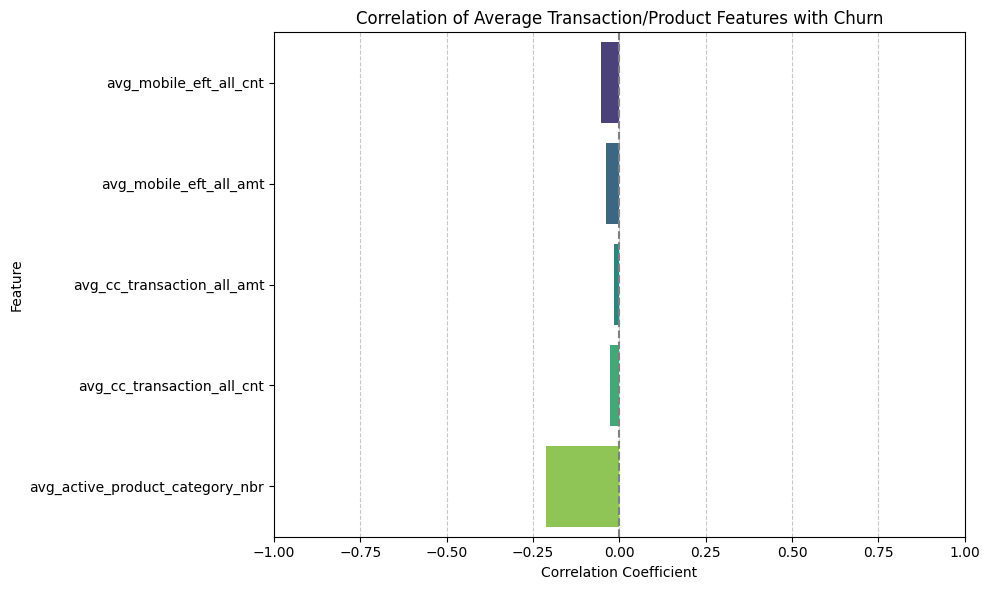

,churn
avg_mobile_eft_all_cnt,-0.052621
avg_mobile_eft_all_amt,-0.037793
avg_cc_transaction_all_amt,-0.015900
avg_cc_transaction_all_cnt,-0.025976
avg_active_product_category_nbr,-0.213119


In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_features = [
    'avg_mobile_eft_all_cnt',
    'avg_mobile_eft_all_amt',
    'avg_cc_transaction_all_amt',
    'avg_cc_transaction_all_cnt',
    'avg_active_product_category_nbr'
]

correlations = df_merged_info_cleaned[correlation_features + ['churn']].corr()['churn'].drop('churn')

correlation_df = correlations.reset_index()
correlation_df.columns = ['Feature', 'Correlation_with_Churn']

plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation_with_Churn', y='Feature', data=correlation_df, palette='viridis')
plt.title('Correlation of Average Transaction/Product Features with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.xlim(-1, 1)
plt.axvline(0, color='grey', linestyle='--')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
display(correlations)

In [123]:
df_cHistory['date'] = pd.to_datetime(df_cHistory['date'])
df_cust_max_date = df_cHistory.groupby('cust_id')['date'].max().reset_index()
df_cust_max_date.rename(columns={'date': 'cust_max_date'}, inplace=True)

print("DataFrame with maximum dates per customer:")
display(df_cust_max_date.head())

DataFrame with maximum dates per customer:


,cust_id,cust_max_date
0,0,2017-09-01
1,3,2018-10-01
2,5,2018-03-01
3,6,2018-04-01
4,7,2018-05-01


In [124]:
df_cHistory = pd.merge(df_cHistory, df_cust_max_date, on='cust_id', how='left')

print("df_cHistory head after merging cust_max_date:")
display(df_cHistory.head())
print("df_cHistory info after merging cust_max_date:")
df_cHistory.info()

df_cHistory head after merging cust_max_date:


,cust_id,date,mobile_eft_all_cnt,active_product_category_nbr,mobile_eft_all_amt,cc_transaction_all_amt,cc_transaction_all_cnt,cust_max_date
0,0,2016-01-01,1.0,2,151.20,NaN,NaN,2017-09-01
1,0,2016-02-01,1.0,2,178.70,NaN,NaN,2017-09-01
2,0,2016-03-01,2.0,2,37.38,NaN,NaN,2017-09-01
3,0,2016-04-01,4.0,2,100.90,NaN,NaN,2017-09-01
4,0,2016-05-01,3.0,3,132.28,NaN,NaN,2017-09-01


df_cHistory info after merging cust_max_date:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660875 entries, 0 to 3660874
Data columns (total 8 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   cust_id                      int64         
 1   date                         datetime64[ns]
 2   mobile_eft_all_cnt           float64       
 3   active_product_category_nbr  int64         
 4   mobile_eft_all_amt           float64       
 5   cc_transaction_all_amt       float64       
 6   cc_transaction_all_cnt       float64       
 7   cust_max_date                datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(2)
memory usage: 223.4 MB


Time windowed olarak son 1, 3 ve 6 ay müşteri history datasının ortalamalarını hesaplayacağız.

In [125]:
columns_to_aggregate = ['mobile_eft_all_cnt', 'mobile_eft_all_amt', 'cc_transaction_all_amt', 'cc_transaction_all_cnt', 'active_product_category_nbr']

# Calculate features for the last 1 month
df_last_1m = df_cHistory[df_cHistory['date'] > (df_cHistory['cust_max_date'] - pd.DateOffset(days=30))]
df_last_1m_agg = df_last_1m.groupby('cust_id')[columns_to_aggregate].mean().reset_index()
new_1m_cols = {col: f'avg_{col}_last_1m_from_max' for col in columns_to_aggregate}
df_last_1m_agg.rename(columns=new_1m_cols, inplace=True)

df_merged_info_cleaned = pd.merge(df_merged_info_cleaned, df_last_1m_agg, on='cust_id', how='left')

print("df_merged_info_cleaned head after adding 1-month features:")
display(df_merged_info_cleaned.head())

df_merged_info_cleaned head after adding 1-month features:


,cust_id,gender,age,province,religion,work_type,work_sector,tenure,ref_date,churn,avg_mobile_eft_all_cnt,avg_mobile_eft_all_amt,avg_cc_transaction_all_amt,avg_cc_transaction_all_cnt,avg_active_product_category_nbr,avg_mobile_eft_all_cnt_last_1m_from_max,avg_mobile_eft_all_amt_last_1m_from_max,avg_cc_transaction_all_amt_last_1m_from_max,avg_cc_transaction_all_cnt_last_1m_from_max,avg_active_product_category_nbr_last_1m_from_max
0,0,F,64,NOH,U,Part-time,Technology,135,2017-09-01,0,2.238095,122.782857,0.000000,0.000000,2.047619,1.0,212.750,NaN,NaN,2.0
1,3,F,22,ZUI,C,Student,NaN,47,2018-10-01,0,1.676471,72.665000,629.045882,24.558824,3.000000,2.0,498.990,1310.08,21.0,3.0
2,5,M,27,ZUI,U,Full-time,Finance,108,2018-03-01,1,2.555556,386.442593,91.887778,13.074074,2.000000,4.5,1056.895,12.30,2.5,2.0
3,6,F,40,NOH,U,Unemployed,NaN,187,2018-04-01,1,7.142857,546.809643,36.278571,5.607143,2.250000,6.0,262.550,11.06,1.0,2.0
4,7,F,64,GEL,U,Part-time,Public Sector,218,2018-05-01,0,0.793103,18.833793,2725.049310,65.482759,3.000000,0.0,0.000,2215.72,77.0,3.0


In [126]:
columns_to_aggregate = ['mobile_eft_all_cnt', 'mobile_eft_all_amt', 'cc_transaction_all_amt', 'cc_transaction_all_cnt', 'active_product_category_nbr']

df_last_3m = df_cHistory[df_cHistory['date'] > (df_cHistory['cust_max_date'] - pd.DateOffset(days=90))]
df_last_3m_agg = df_last_3m.groupby('cust_id')[columns_to_aggregate].mean().reset_index()
new_3m_cols = {col: f'avg_{col}_last_3m_from_max' for col in columns_to_aggregate}
df_last_3m_agg.rename(columns=new_3m_cols, inplace=True)

df_merged_info_cleaned = pd.merge(df_merged_info_cleaned, df_last_3m_agg, on='cust_id', how='left')

print("df_merged_info_cleaned head after adding 3-month features:")
display(df_merged_info_cleaned.head())

df_merged_info_cleaned head after adding 3-month features:


,cust_id,gender,age,province,religion,work_type,work_sector,tenure,ref_date,churn,...,avg_mobile_eft_all_cnt_last_1m_from_max,avg_mobile_eft_all_amt_last_1m_from_max,avg_cc_transaction_all_amt_last_1m_from_max,avg_cc_transaction_all_cnt_last_1m_from_max,avg_active_product_category_nbr_last_1m_from_max,avg_mobile_eft_all_cnt_last_3m_from_max,avg_mobile_eft_all_amt_last_3m_from_max,avg_cc_transaction_all_amt_last_3m_from_max,avg_cc_transaction_all_cnt_last_3m_from_max,avg_active_product_category_nbr_last_3m_from_max
0,0,F,64,NOH,U,Part-time,Technology,135,2017-09-01,0,...,1.0,212.750,NaN,NaN,2.0,1.666667,230.363333,NaN,NaN,2.0
1,3,F,22,ZUI,C,Student,NaN,47,2018-10-01,0,...,2.0,498.990,1310.08,21.0,3.0,1.333333,355.486667,1090.980000,19.333333,3.0
2,5,M,27,ZUI,U,Full-time,Finance,108,2018-03-01,1,...,4.5,1056.895,12.30,2.5,2.0,4.333333,1058.190000,13.076667,2.666667,2.0
3,6,F,40,NOH,U,Unemployed,NaN,187,2018-04-01,1,...,6.0,262.550,11.06,1.0,2.0,6.000000,330.063333,15.433333,1.666667,2.0
4,7,F,64,GEL,U,Part-time,Public Sector,218,2018-05-01,0,...,0.0,0.000,2215.72,77.0,3.0,0.000000,0.000000,1898.900000,73.000000,3.0


In [127]:
columns_to_aggregate = ['mobile_eft_all_cnt', 'mobile_eft_all_amt', 'cc_transaction_all_amt', 'cc_transaction_all_cnt', 'active_product_category_nbr']

df_last_6m = df_cHistory[df_cHistory['date'] > (df_cHistory['cust_max_date'] - pd.DateOffset(days=180))]
df_last_6m_agg = df_last_6m.groupby('cust_id')[columns_to_aggregate].mean().reset_index()
new_6m_cols = {col: f'avg_{col}_last_6m_from_max' for col in columns_to_aggregate}
df_last_6m_agg.rename(columns=new_6m_cols, inplace=True)

df_merged_info_cleaned = pd.merge(df_merged_info_cleaned, df_last_6m_agg, on='cust_id', how='left')

print("df_merged_info_cleaned head after adding 6-month features:")
display(df_merged_info_cleaned.head())

df_merged_info_cleaned head after adding 6-month features:


,cust_id,gender,age,province,religion,work_type,work_sector,tenure,ref_date,churn,...,avg_mobile_eft_all_cnt_last_3m_from_max,avg_mobile_eft_all_amt_last_3m_from_max,avg_cc_transaction_all_amt_last_3m_from_max,avg_cc_transaction_all_cnt_last_3m_from_max,avg_active_product_category_nbr_last_3m_from_max,avg_mobile_eft_all_cnt_last_6m_from_max,avg_mobile_eft_all_amt_last_6m_from_max,avg_cc_transaction_all_amt_last_6m_from_max,avg_cc_transaction_all_cnt_last_6m_from_max,avg_active_product_category_nbr_last_6m_from_max
0,0,F,64,NOH,U,Part-time,Technology,135,2017-09-01,0,...,1.666667,230.363333,NaN,NaN,2.0,2.000000,173.935000,NaN,NaN,2.000000
1,3,F,22,ZUI,C,Student,NaN,47,2018-10-01,0,...,1.333333,355.486667,1090.980000,19.333333,3.0,1.166667,258.471667,761.280000,20.000000,3.000000
2,5,M,27,ZUI,U,Full-time,Finance,108,2018-03-01,1,...,4.333333,1058.190000,13.076667,2.666667,2.0,3.833333,816.171667,14.975000,2.666667,2.000000
3,6,F,40,NOH,U,Unemployed,NaN,187,2018-04-01,1,...,6.000000,330.063333,15.433333,1.666667,2.0,5.166667,326.803333,14.988333,1.333333,2.166667
4,7,F,64,GEL,U,Part-time,Public Sector,218,2018-05-01,0,...,0.000000,0.000000,1898.900000,73.000000,3.0,0.000000,0.000000,1879.428333,74.333333,3.000000


In [128]:
new_feature_suffixes = ['_last_1m_from_max', '_last_3m_from_max', '_last_6m_from_max']
all_new_feature_cols = []

for suffix in new_feature_suffixes:
    for col in columns_to_aggregate:
        all_new_feature_cols.append(f'avg_{col}{suffix}')


df_merged_info_cleaned[all_new_feature_cols] = df_merged_info_cleaned[all_new_feature_cols].fillna(0)

print("df_merged_info_cleaned head after filling NaNs in new features:")
display(df_merged_info_cleaned.head())

print("\ndf_merged_info_cleaned info after filling NaNs:")
df_merged_info_cleaned.info()

df_merged_info_cleaned head after filling NaNs in new features:


,cust_id,gender,age,province,religion,work_type,work_sector,tenure,ref_date,churn,...,avg_mobile_eft_all_cnt_last_3m_from_max,avg_mobile_eft_all_amt_last_3m_from_max,avg_cc_transaction_all_amt_last_3m_from_max,avg_cc_transaction_all_cnt_last_3m_from_max,avg_active_product_category_nbr_last_3m_from_max,avg_mobile_eft_all_cnt_last_6m_from_max,avg_mobile_eft_all_amt_last_6m_from_max,avg_cc_transaction_all_amt_last_6m_from_max,avg_cc_transaction_all_cnt_last_6m_from_max,avg_active_product_category_nbr_last_6m_from_max
0,0,F,64,NOH,U,Part-time,Technology,135,2017-09-01,0,...,1.666667,230.363333,0.000000,0.000000,2.0,2.000000,173.935000,0.000000,0.000000,2.000000
1,3,F,22,ZUI,C,Student,NaN,47,2018-10-01,0,...,1.333333,355.486667,1090.980000,19.333333,3.0,1.166667,258.471667,761.280000,20.000000,3.000000
2,5,M,27,ZUI,U,Full-time,Finance,108,2018-03-01,1,...,4.333333,1058.190000,13.076667,2.666667,2.0,3.833333,816.171667,14.975000,2.666667,2.000000
3,6,F,40,NOH,U,Unemployed,NaN,187,2018-04-01,1,...,6.000000,330.063333,15.433333,1.666667,2.0,5.166667,326.803333,14.988333,1.333333,2.166667
4,7,F,64,GEL,U,Part-time,Public Sector,218,2018-05-01,0,...,0.000000,0.000000,1898.900000,73.000000,3.0,0.000000,0.000000,1879.428333,74.333333,3.000000



df_merged_info_cleaned info after filling NaNs:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133287 entries, 0 to 133286
Data columns (total 30 columns):
 #   Column                                            Non-Null Count   Dtype         
---  ------                                            --------------   -----         
 0   cust_id                                           133287 non-null  int64         
 1   gender                                            133287 non-null  object        
 2   age                                               133287 non-null  int64         
 3   province                                          133287 non-null  object        
 4   religion                                          133287 non-null  object        
 5   work_type                                         133287 non-null  object        
 6   work_sector                                       110520 non-null  object        
 7   tenure                                            13

/tmp/ipython-input-2898555227.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation_with_Churn', y='Feature', data=correlation_df_new, palette='viridis')


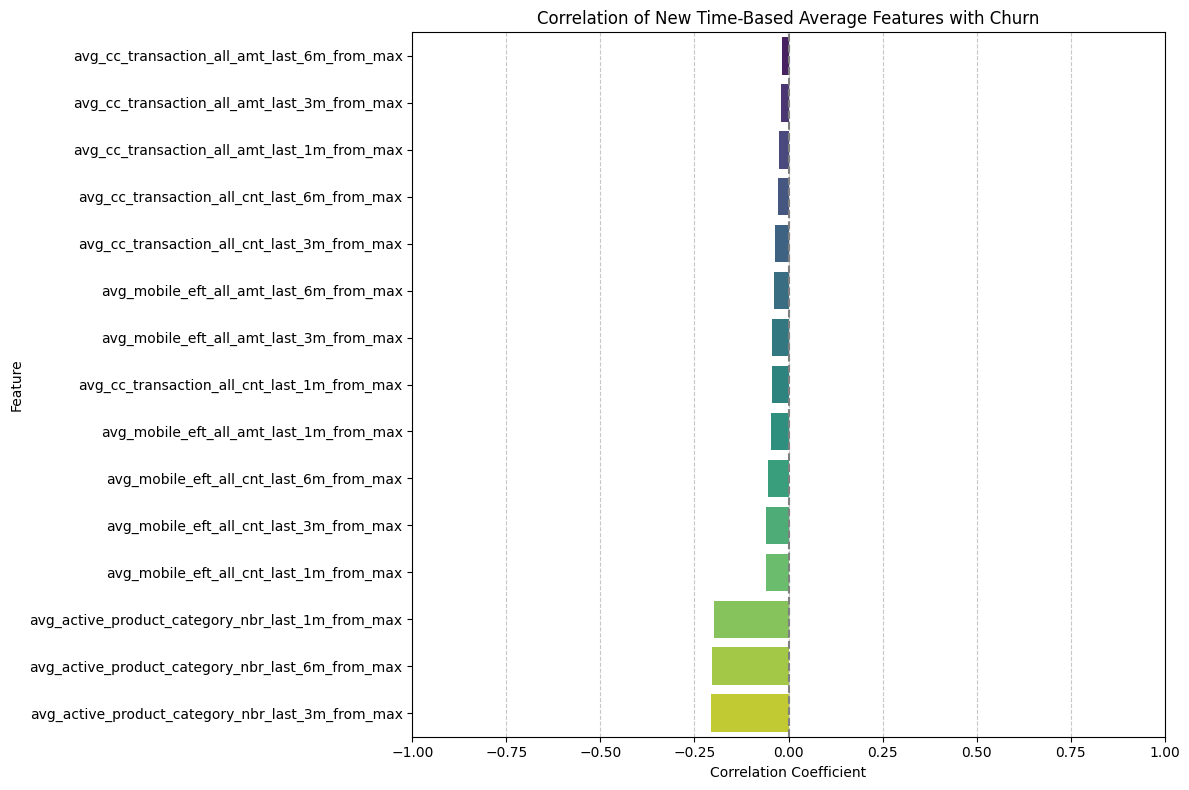

,churn
avg_mobile_eft_all_cnt_last_1m_from_max,-0.060908
avg_mobile_eft_all_amt_last_1m_from_max,-0.046541
avg_cc_transaction_all_amt_last_1m_from_max,-0.025502
avg_cc_transaction_all_cnt_last_1m_from_max,-0.043600
avg_active_product_category_nbr_last_1m_from_max,-0.198665
avg_mobile_eft_all_cnt_last_3m_from_max,-0.058627
avg_mobile_eft_all_amt_last_3m_from_max,-0.043404
avg_cc_transaction_all_amt_last_3m_from_max,-0.021161
avg_cc_transaction_all_cnt_last_3m_from_max,-0.035008
avg_active_product_category_nbr_last_3m_from_max,-0.204989


In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_features_new = all_new_feature_cols

correlations_new = df_merged_info_cleaned[correlation_features_new + ['churn']].corr()['churn'].drop('churn')

correlation_df_new = correlations_new.reset_index()
correlation_df_new.columns = ['Feature', 'Correlation_with_Churn']

correlation_df_new = correlation_df_new.sort_values(by='Correlation_with_Churn', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Correlation_with_Churn', y='Feature', data=correlation_df_new, palette='viridis')
plt.title('Correlation of New Time-Based Average Features with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.xlim(-1, 1)
plt.axvline(0, color='grey', linestyle='--')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

display(correlations_new)

In [130]:
# Extract correlations with 'churn' from the correlation matrix
churn_correlations = correlation_matrix['churn'].sort_values(ascending=False)

print("Correlations with 'churn' (Sorted Descending):")
display(churn_correlations)

Correlations with 'churn' (Sorted Descending):


,churn
churn,1.000000
age,0.030268
months_with_zero_mobile_eft_all_cnt,0.019123
months_with_zero_mobile_eft_all_amt,0.019123
tenure,0.018389
months_with_zero_cc_transaction_all_cnt,-0.007993
months_with_zero_cc_transaction_all_amt,-0.007993
avg_active_product_category_nbr_1m_vs_3m_diff,-0.015060
avg_mobile_eft_all_cnt_1m_vs_3m_diff,-0.015315
avg_cc_transaction_all_amt,-0.015900


### Cinsiyete Göre Churn Oranı Dağılımı

Bu grafik, kadın ve erkek müşteriler arasındaki churn oranını karşılaştırmaktadır.

/tmp/ipython-input-550164067.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='churn_rate', data=churn_by_gender, palette='pastel')


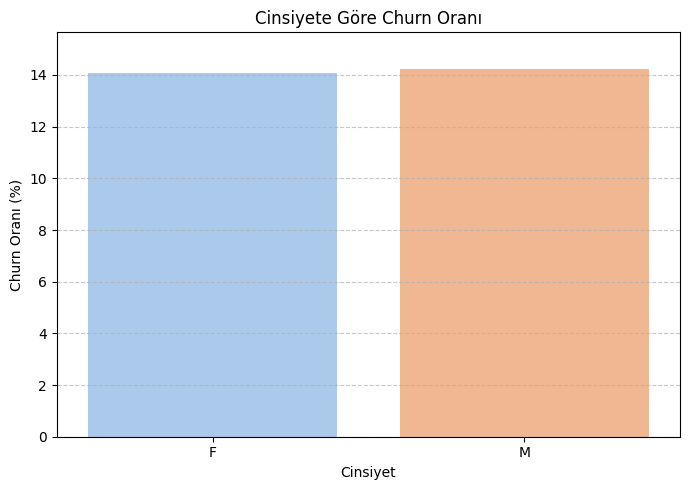

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns


churn_by_gender = df_merged_info_cleaned.groupby('gender')['churn'].mean().reset_index()
churn_by_gender['churn_rate'] = churn_by_gender['churn'] * 100

plt.figure(figsize=(7, 5))
sns.barplot(x='gender', y='churn_rate', data=churn_by_gender, palette='pastel')
plt.title('Cinsiyete Göre Churn Oranı')
plt.xlabel('Cinsiyet')
plt.ylabel('Churn Oranı (%)')
plt.ylim(0, churn_by_gender['churn_rate'].max() * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Cinsiyetin oranları aynı

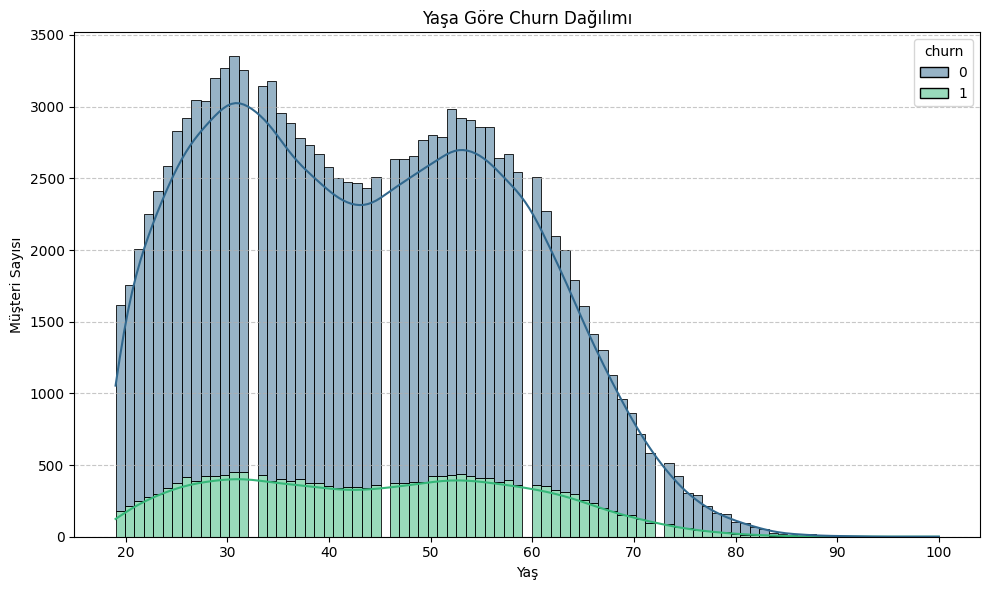

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df_merged_info_cleaned, x='age', hue='churn', kde=True, palette='viridis', multiple='stack')
plt.title('Yaşa Göre Churn Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Müşteri Sayısı')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-323352429.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='work_type', y='churn_rate', data=churn_by_work_type, palette='coolwarm')


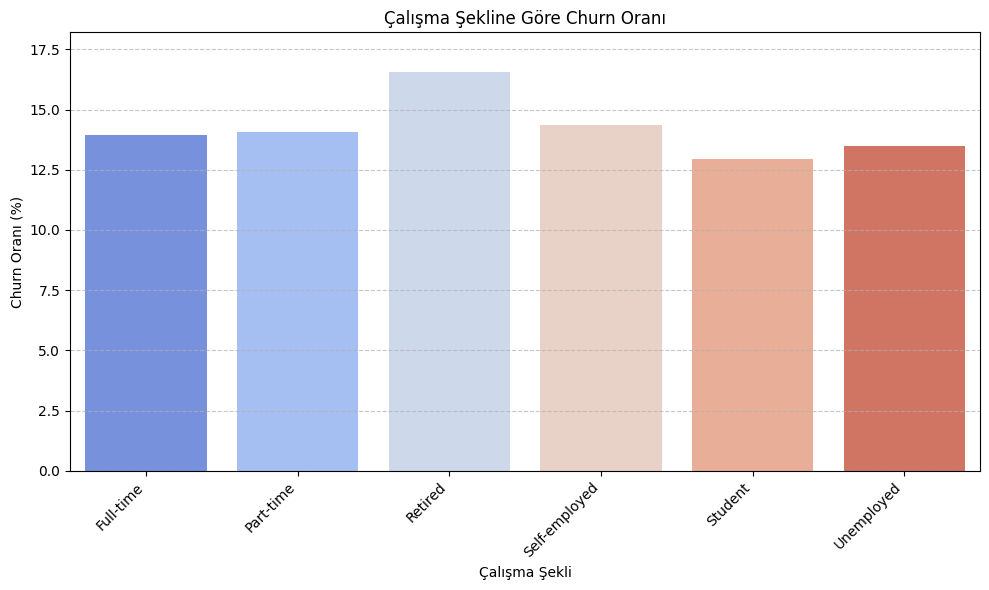

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Churn rate by work_type
churn_by_work_type = df_merged_info_cleaned.groupby('work_type')['churn'].mean().reset_index()
churn_by_work_type['churn_rate'] = churn_by_work_type['churn'] * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='work_type', y='churn_rate', data=churn_by_work_type, palette='coolwarm')
plt.title('Çalışma Şekline Göre Churn Oranı')
plt.xlabel('Çalışma Şekli')
plt.ylabel('Churn Oranı (%)')
plt.ylim(0, churn_by_work_type['churn_rate'].max() * 1.1)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3727129637.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='churn', y='avg_active_product_category_nbr', data=df_merged_info_cleaned, palette='coolwarm')
/tmp/ipython-input-3727129637.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='churn', y='avg_active_product_category_nbr_last_1m_from_max', data=df_merged_info_cleaned, palette='viridis')


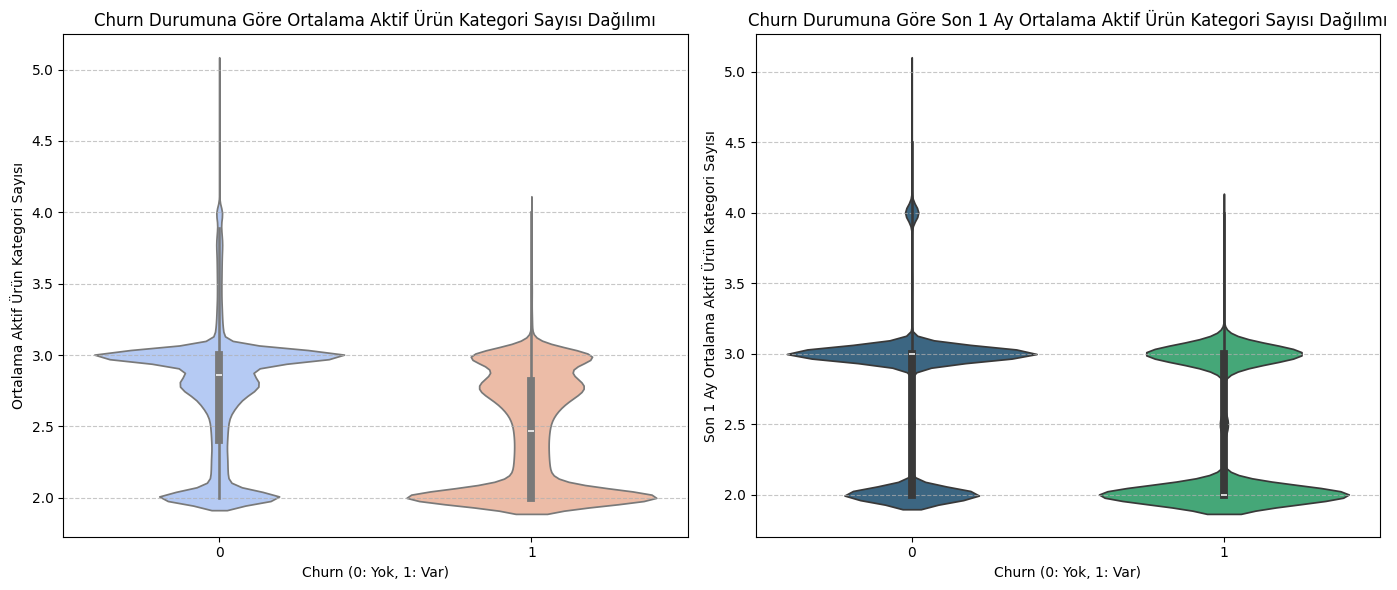

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.violinplot(x='churn', y='avg_active_product_category_nbr', data=df_merged_info_cleaned, palette='coolwarm')
plt.title('Churn Durumuna Göre Ortalama Aktif Ürün Kategori Sayısı Dağılımı')
plt.xlabel('Churn (0: Yok, 1: Var)')
plt.ylabel('Ortalama Aktif Ürün Kategori Sayısı')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.violinplot(x='churn', y='avg_active_product_category_nbr_last_1m_from_max', data=df_merged_info_cleaned, palette='viridis')
plt.title('Churn Durumuna Göre Son 1 Ay Ortalama Aktif Ürün Kategori Sayısı Dağılımı')
plt.xlabel('Churn (0: Yok, 1: Var)')
plt.ylabel('Son 1 Ay Ortalama Aktif Ürün Kategori Sayısı')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

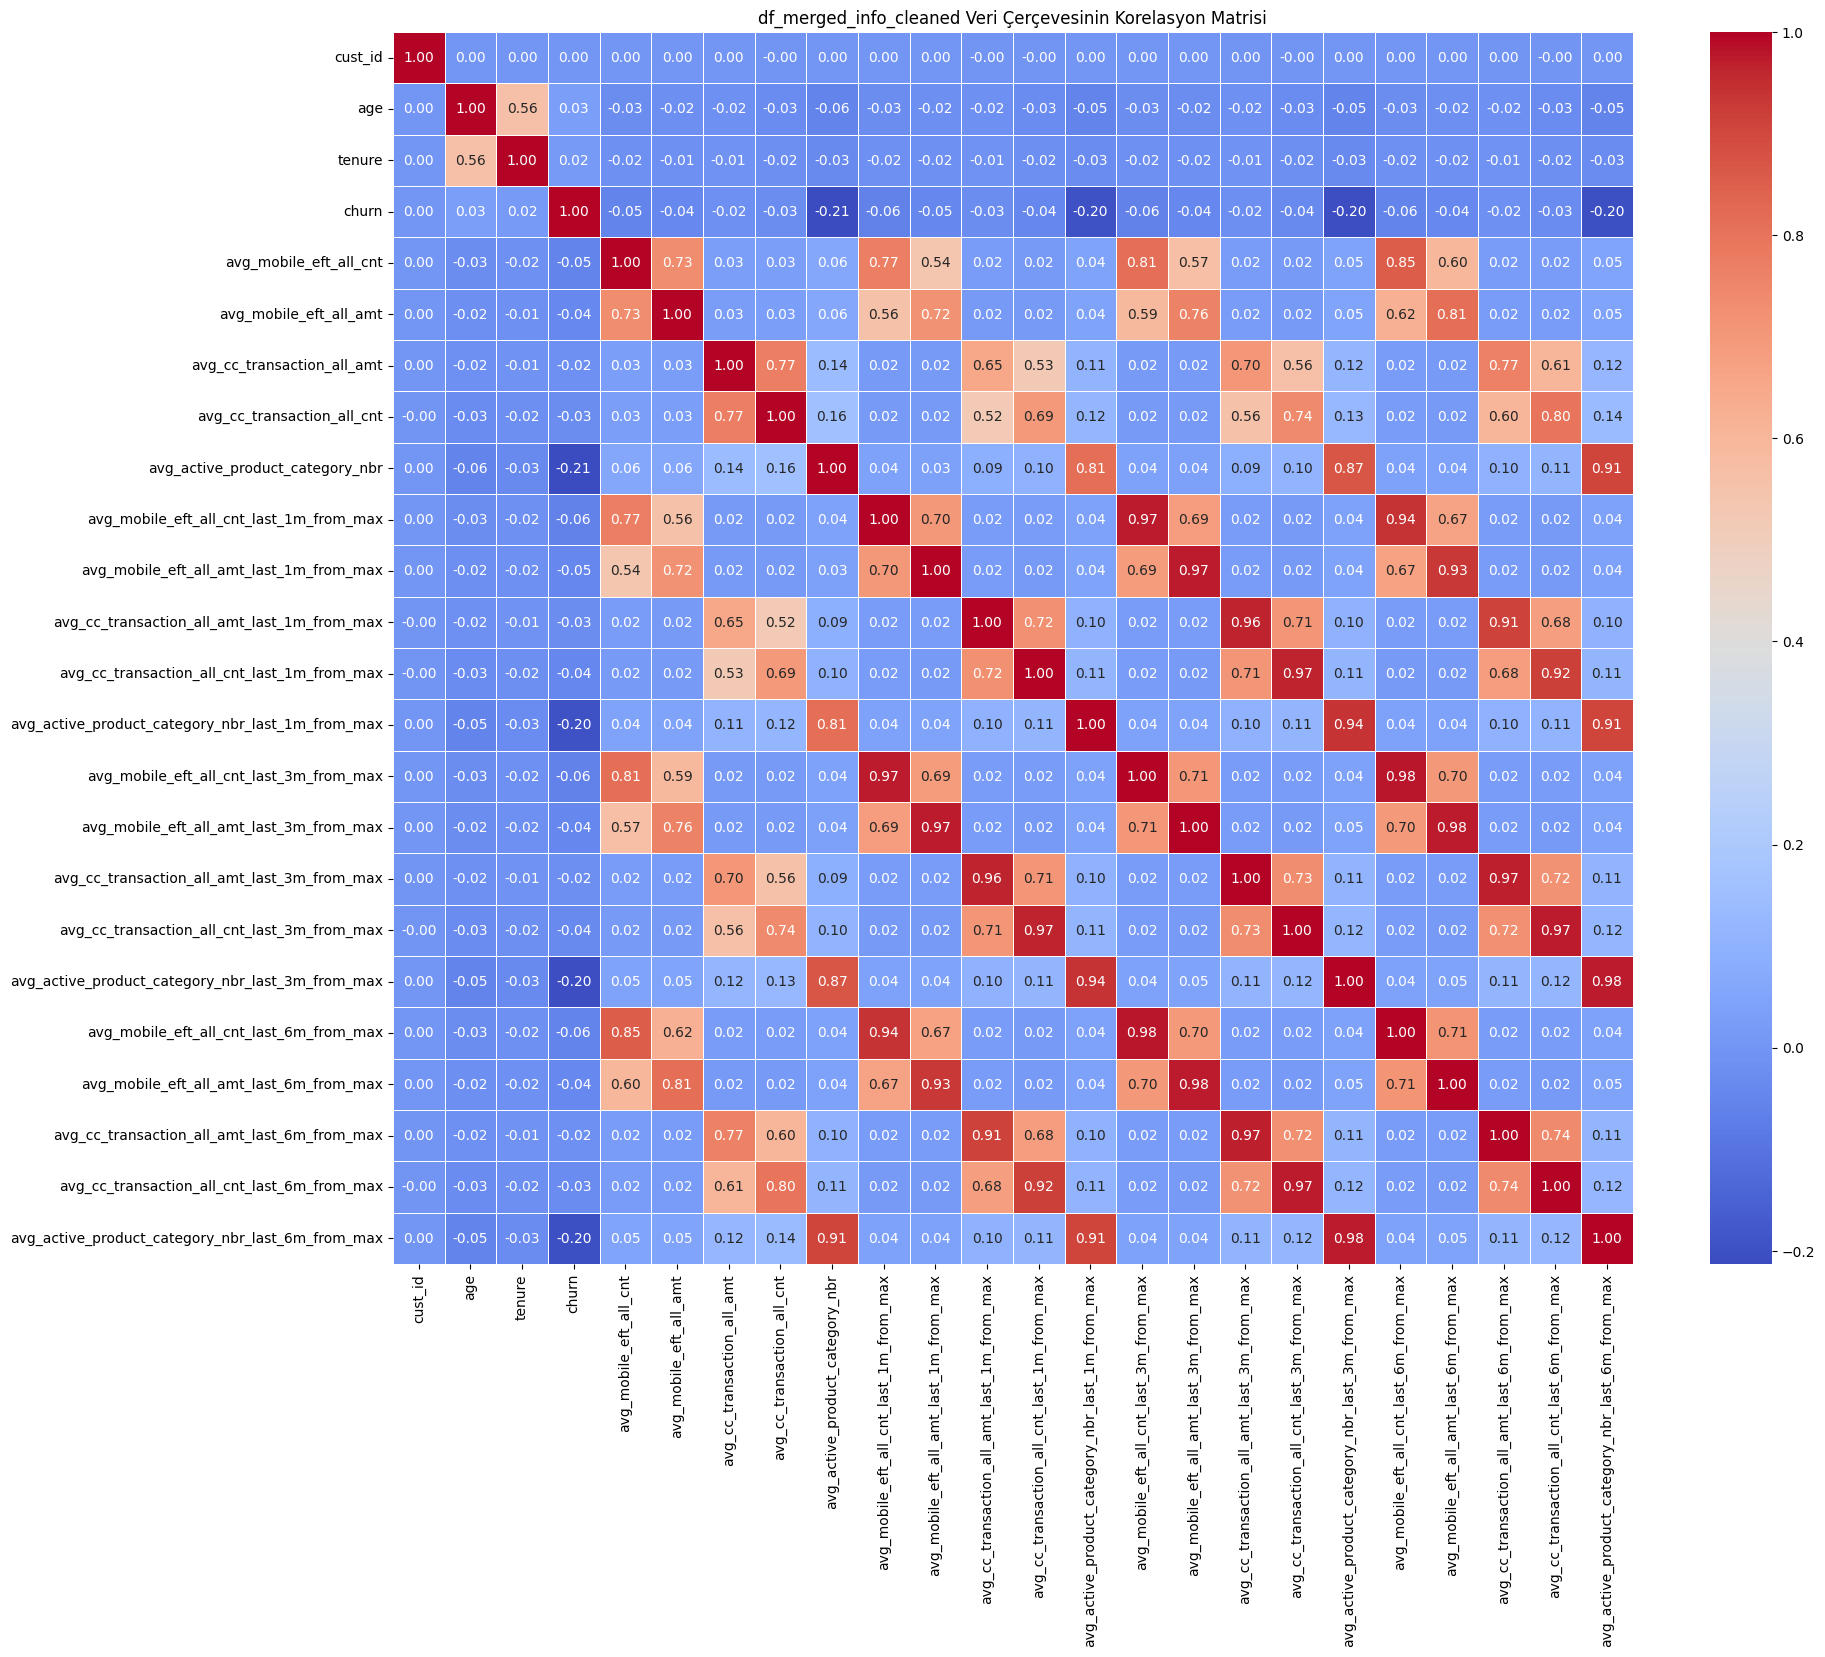

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df_merged_info_cleaned.corr(numeric_only=True)

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('df_merged_info_cleaned Veri Çerçevesinin Korelasyon Matrisi')
plt.show()

In [139]:
numerical_cols = df_merged_info_cleaned.select_dtypes(include=np.number).columns.tolist()
if 'cust_id' in numerical_cols:
    numerical_cols.remove('cust_id')

if 'churn' not in numerical_cols:
    numerical_cols.append('churn')

print("Numerical columns selected for correlation:")
print(numerical_cols)

Numerical columns selected for correlation:
['age', 'tenure', 'churn', 'avg_mobile_eft_all_cnt', 'avg_mobile_eft_all_amt', 'avg_cc_transaction_all_amt', 'avg_cc_transaction_all_cnt', 'avg_active_product_category_nbr', 'avg_mobile_eft_all_cnt_last_1m_from_max', 'avg_mobile_eft_all_amt_last_1m_from_max', 'avg_cc_transaction_all_amt_last_1m_from_max', 'avg_cc_transaction_all_cnt_last_1m_from_max', 'avg_active_product_category_nbr_last_1m_from_max', 'avg_mobile_eft_all_cnt_last_3m_from_max', 'avg_mobile_eft_all_amt_last_3m_from_max', 'avg_cc_transaction_all_amt_last_3m_from_max', 'avg_cc_transaction_all_cnt_last_3m_from_max', 'avg_active_product_category_nbr_last_3m_from_max', 'avg_mobile_eft_all_cnt_last_6m_from_max', 'avg_mobile_eft_all_amt_last_6m_from_max', 'avg_cc_transaction_all_amt_last_6m_from_max', 'avg_cc_transaction_all_cnt_last_6m_from_max', 'avg_active_product_category_nbr_last_6m_from_max']


In [140]:
churn_correlations = df_merged_info_cleaned[numerical_cols].corr()['churn']
absolute_churn_correlations = churn_correlations.abs().sort_values(ascending=False)

absolute_churn_correlations = absolute_churn_correlations.drop('churn')

print("Absolute correlation of numerical features with 'churn' (sorted descending):")
display(absolute_churn_correlations)

Absolute correlation of numerical features with 'churn' (sorted descending):


,churn
avg_active_product_category_nbr,0.213119
avg_active_product_category_nbr_last_3m_from_max,0.204989
avg_active_product_category_nbr_last_6m_from_max,0.203048
avg_active_product_category_nbr_last_1m_from_max,0.198665
avg_mobile_eft_all_cnt_last_1m_from_max,0.060908
avg_mobile_eft_all_cnt_last_3m_from_max,0.058627
avg_mobile_eft_all_cnt_last_6m_from_max,0.055858
avg_mobile_eft_all_cnt,0.052621
avg_mobile_eft_all_amt_last_1m_from_max,0.046541
avg_cc_transaction_all_cnt_last_1m_from_max,0.043600


kendi aralarındaki korelasyonu 0.67'den fazla olanlardan siliyoruz


In [142]:
correlation_threshold = 0.67
selected_features = []

full_corr_matrix = df_merged_info_cleaned[numerical_cols].corr().abs()

for feature, churn_corr in absolute_churn_correlations.items():
    if not selected_features:
        selected_features.append(feature)
    else:
        is_low_inter_correlated = True
        for selected_f in selected_features:
            if feature in full_corr_matrix.columns and selected_f in full_corr_matrix.index:
                inter_corr = full_corr_matrix.loc[selected_f, feature]
                if inter_corr >= correlation_threshold:
                    is_low_inter_correlated = False
                    break
            elif feature == selected_f:
                is_low_inter_correlated = False
                break

        if is_low_inter_correlated:
            selected_features.append(feature)

print(f"Selected features with absolute churn correlation > 0 and inter-correlation < {correlation_threshold}:")
print(selected_features)


Selected features with absolute churn correlation > 0 and inter-correlation < 0.67:
['avg_active_product_category_nbr', 'avg_mobile_eft_all_cnt_last_1m_from_max', 'avg_cc_transaction_all_cnt_last_1m_from_max', 'avg_mobile_eft_all_amt_last_6m_from_max', 'age', 'tenure', 'avg_cc_transaction_all_amt']


Kullanacağımız özellikleri belirledik fakat korelasyonlar düşük olduğu non linear bir model kullanacağız. Catboost veya XGBoost gibi...
